In [1]:
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

yf.pdr_override()
sns.set()

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
BAC = pdr.get_data_yahoo('BAC', data_source='yahoo', start=start, end=end)
C =   pdr.get_data_yahoo('C',   data_source='yahoo', start=start, end=end)
GS =  pdr.get_data_yahoo('GS',  data_source='yahoo', start=start, end=end)
JPM = pdr.get_data_yahoo('JPM', data_source='yahoo', start=start, end=end)
MS =  pdr.get_data_yahoo('MS',  data_source='yahoo', start=start, end=end)
WFC = pdr.get_data_yahoo('WFC', data_source='yahoo', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [5]:
bank_stocks

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  34.106022  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  33.743801  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  33.787273  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  33.736576  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  33.758312  15619400   
...                ...        ...        ...        ...        ...       ...   
2015-12-24   17.320000  17.379999  17.219999  17.270000  15.430057  29369400   
2015-12-28   17.219999  17.230000  16.980000  17.129999  15.304973  41777500   
2015-12-29   17.250000  17.350000  17.160000  17.280001  15.438996  45670400   
2015-12-30   17.200001  17.240000  17.040001  17.049999  15.233496  35066400   
2015-12-31   17.010000  17.070000  16.830000  16.830000  15.036936  47153000   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   
...                 ...         ...         ...         ...  ...        ...   
2015-12-24    52.480000   52.970001   52.450001   52.709999  ...  32.439999   
2015-12-28    52.570000   52.570000   51.959999   52.380001  ...  31.950001   
2015-12-29    52.759998   53.220001   52.740002   52.980000  ...  32.330002   
2015-12-30    52.840000   52.939999   52.250000   52.299999  ...  32.200001   
2015-12-31    52.070000   52.389999   51.750000   51.750000  ...  31.770000   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  36.364140  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  36.389080  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  36.488873  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  36.526287  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  36.912933  4144500  31.674999  31.825001  31.555000   
...                ...        ...      ...        ...        ...        ...   
2015-12-24   32.480000  28.227333  2798200  54.970001  55.090000  54.709999   
2015-12-28   32.169998  27.957928  5420300  54.549999  54.779999  54.169998   
2015-12-29   32.549999  28.288166  6388200  55.110001  55.349998  54.990002   
2015-12-30   32.230000  28.010069  5057200  55.270000  55.310001  54.790001   
2015-12-31   31.809999  27.645060  8154300  54.509998  54.950001  54.220001   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  20.523809  11016400  
2006-01-04   31.530001  20.285761  10870000  
2006-01-05   31.495001  20.263239  10158000  
2006-01-06   31.680000  20.382263   8403800  
2006-01-09   31.674999  20.379047   5619600  
...                ...        ...       ...  
2015-12-24   54.820000  45.933815   4999400  
2015-12-28   54.680000  45.816509   8288800  
2015-12-29   55.290001  46.327637   7894900  
2015-12-30   54.889999  45.992481   8016900  
2015-12-31   54.360001  45.548393  10929800  

[2517 rows x 36 colu

### max Close price for each bank`s stock throughout the time period

In [6]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

### Create a new dataframe that will contain the returns for each bank`s stock.

$$ r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1 $$

In [7]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### Plot the returns dataframe as pairplot

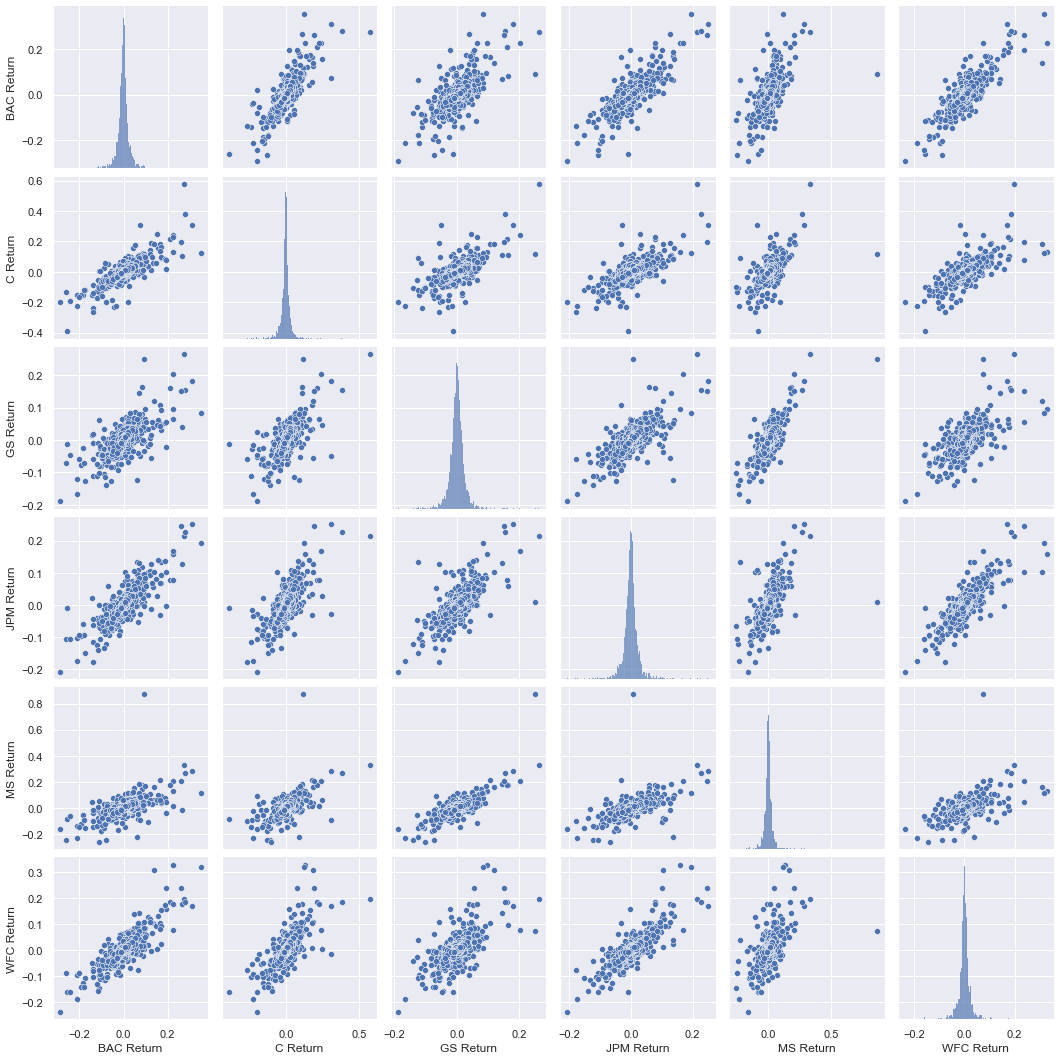

In [8]:
sns.pairplot(returns[1:])
plt.show()

### When were the worst drops of the bank stocks?

In [9]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

### When were the best single day gain`s ? -> citigroup stock split in May 2011, but also JPM day after inauguration.

In [10]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

### Classify the riskiest stock

In [11]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

### Plot the 2015 returns for Morgan Stanley and the 2008 returns for CitiGroup

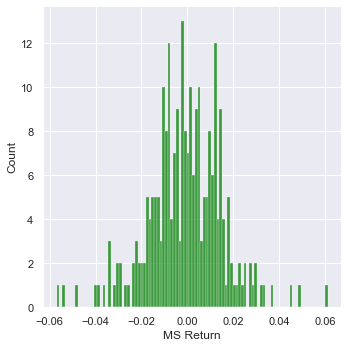

In [12]:
sns.displot(returns['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)
plt.show()

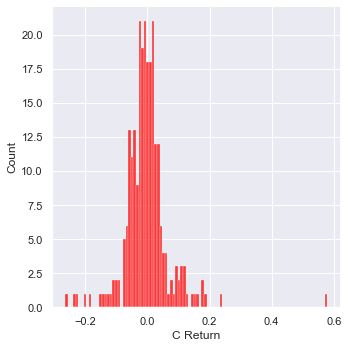

In [13]:
sns.displot(returns['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)
plt.show()

### Create a line plot showing Close price for each bank for the entire index of time

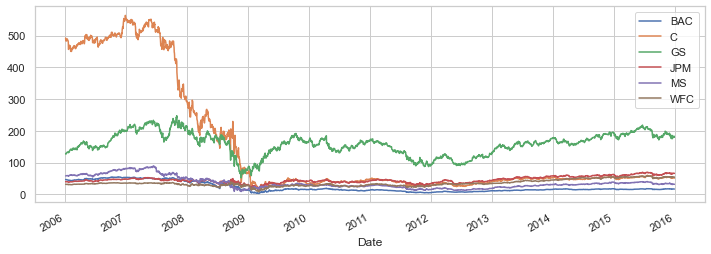

In [14]:
sns.set_style('whitegrid')
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.show()

### Create interactive chart with plotly

In [15]:
import plotly
import cufflinks as cf
cf.go_offline()
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()
plt.show()

### Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

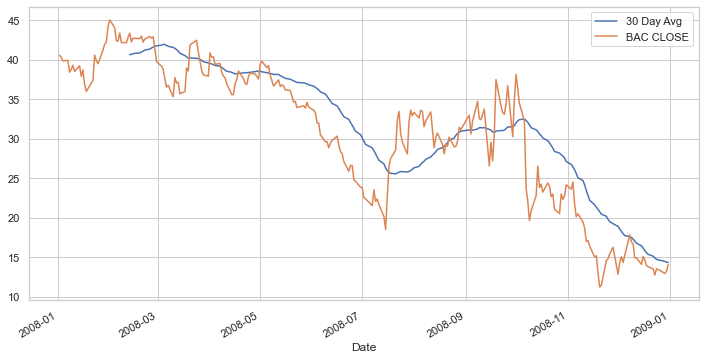

In [16]:
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.show()

### Create a heatmap of the correlation between the stocks Close Price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

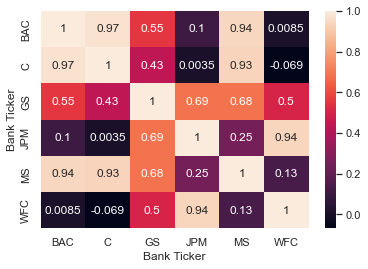

In [17]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

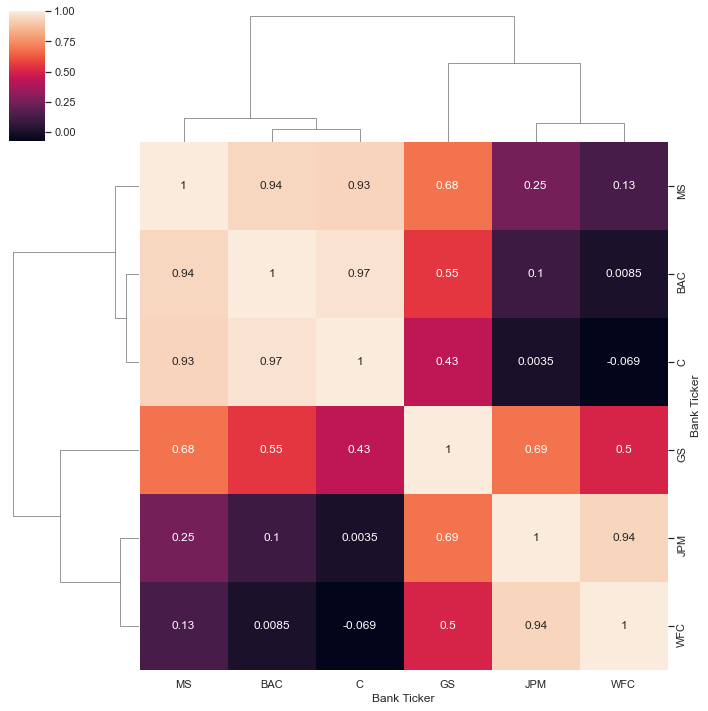

In [18]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [19]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')
plt.show()

### Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [20]:
BAC[['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle')
plt.show()

### Create a Simple Moving Averages plot of Morgan Stanley for the year 2015

In [21]:
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')
plt.show()

### Create a Bollinger Band Plot for Bank of America for the year 2015

In [22]:
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')
plt.show()